In [29]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
train  = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [9]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [14]:
train.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [18]:
train = train[['date','meantemp']]
test = test[['date','meantemp']]

In [17]:
train.head()

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000


In [19]:
test.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


In [34]:
train = train.rename(columns={'date': 'ds', 'meantemp': 'y'})
test = test.rename(columns={'date': 'ds', 'meantemp': 'y'})

In [35]:
train

,ds,y
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [36]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(train)


19:06:17 - cmdstanpy - INFO - Chain [1] start processing
19:06:18 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)


In [38]:
print(forecast)

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  27.531065   11.739298   16.976255    27.531065    27.531065   
1   2017-01-02  27.533981   12.101962   17.165852    27.533981    27.533981   
2   2017-01-03  27.536897   12.088956   17.201217    27.536897    27.536897   
3   2017-01-04  27.539812   12.357520   17.548954    27.539812    27.539812   
4   2017-01-05  27.542728   12.248994   17.366134    27.542728    27.542728   
..         ...        ...         ...         ...          ...          ...   
109 2017-04-20  27.848889   30.237536   35.461789    27.765666    27.929164   
110 2017-04-21  27.851805   30.313197   35.756595    27.767448    27.933403   
111 2017-04-22  27.854720   30.490176   35.786973    27.769231    27.937687   
112 2017-04-23  27.857636   30.485255   35.841144    27.771032    27.942373   
113 2017-04-24  27.860552   30.773231   36.225099    27.772742    27.946337   

     additive_terms  additive_terms_lower  additive

In [39]:
# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance (example using Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.192482426074284


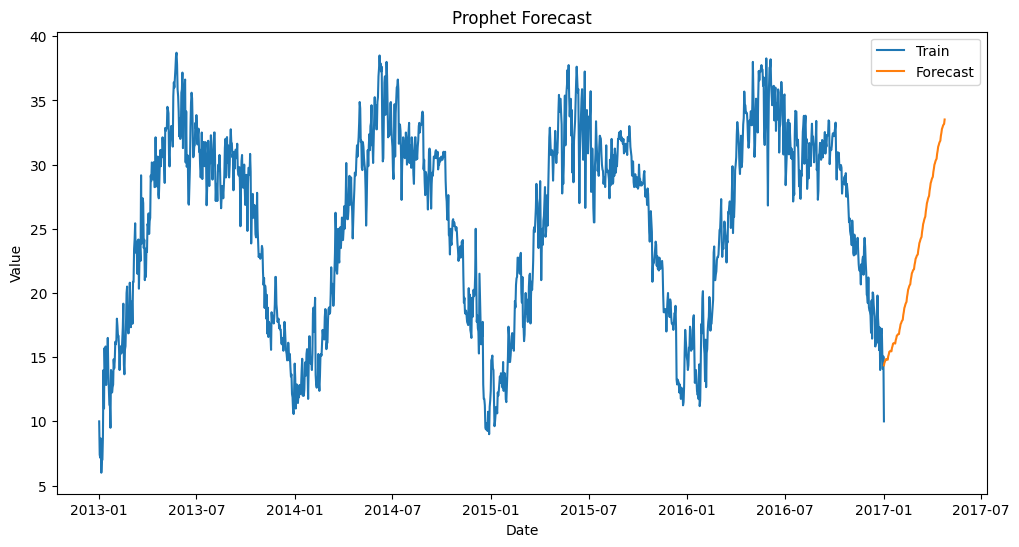

In [41]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
#plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


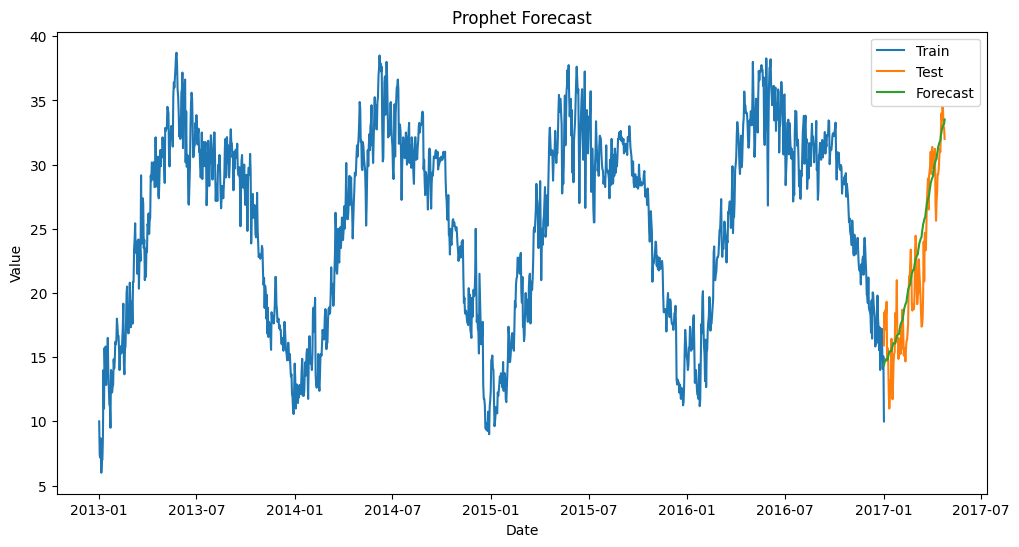

In [42]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

# Model 2

In [43]:
# Initialize the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust this value
    seasonality_prior_scale=10.0,  # Adjust this value
    yearly_seasonality=True,       # Enable yearly seasonality
    weekly_seasonality=True,       # Enable weekly seasonality
    daily_seasonality=False        # Disable daily seasonality if not needed
)

# Fit the model
model.fit(train)


19:14:18 - cmdstanpy - INFO - Chain [1] start processing
19:14:18 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)


In [46]:
# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance (example using Mean Absolute Error)
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.192482426074284


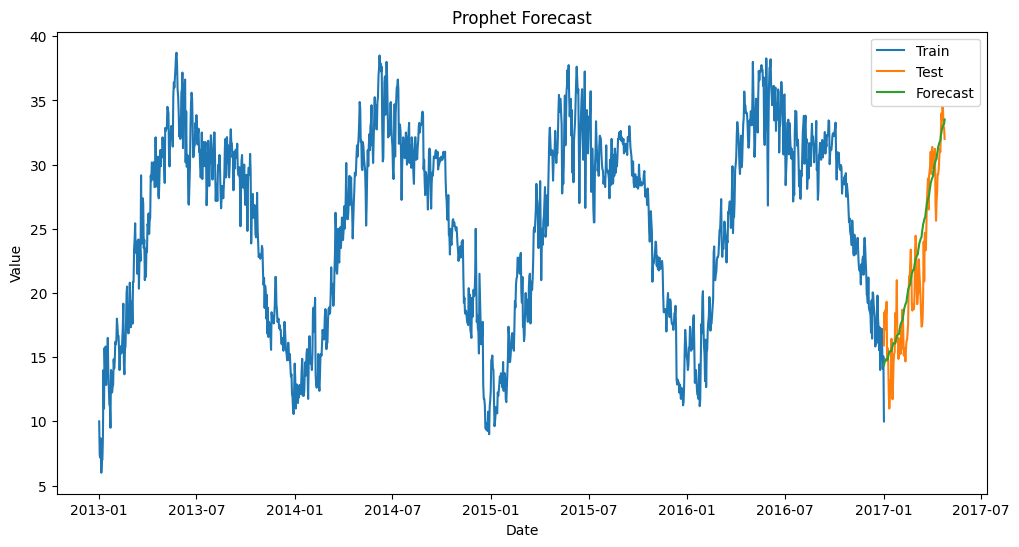

In [47]:
# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


# Adding daily seasonality as True


19:27:44 - cmdstanpy - INFO - Chain [1] start processing
19:27:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2.2368455081667586


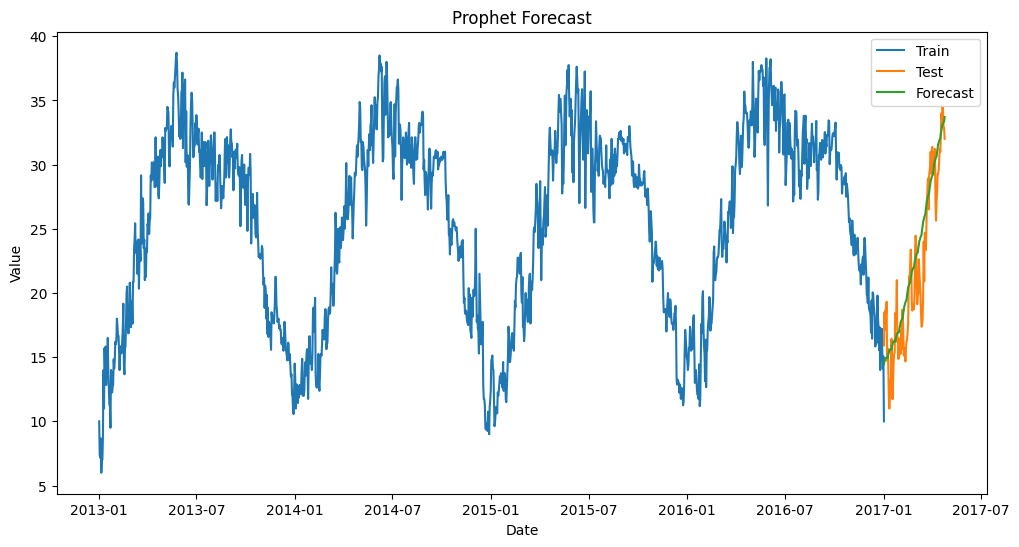

In [48]:
# Initialize the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust this value
    seasonality_prior_scale=10.0,  # Adjust this value
    yearly_seasonality=True,       # Enable yearly seasonality
    weekly_seasonality=True,       # Enable weekly seasonality
    daily_seasonality=True        # Disable daily seasonality if not needed
)

# Fit the model
model.fit(train)

# Create a dataframe for future dates (test data)
future = test[['ds']]

# Make predictions
forecast = model.predict(future)

# Merge the forecasted values with the test data
test['yhat'] = forecast['yhat']

# Evaluate model performance
mae = mean_absolute_error(test['y'], test['yhat'])
print(f'Mean Absolute Error: {mae}')

# Plot the forecast
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train['ds'], train['y'], label='Train')

# Plot the test data
plt.plot(test['ds'], test['y'], label='Test')

# Plot the forecast
plt.plot(test['ds'], test['yhat'], label='Forecast')

# Add title and labels
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



In [3]:
# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Fix random seed for reproducibility
np.random.seed(7)
tf.random.set_seed(7)

# Load the dataset (replace with your data loading mechanism)
dataframe = pd.read_csv('data.csv', usecols=[3])
dataset = dataframe.values.astype('float32')



In [4]:
dataframe.head()

,wind_speed
0,0.000000
1,2.980000
2,4.633333
3,1.233333
4,3.700000


C:\Users\JeromGnanamanikam\anaconda3\envs\forecasting\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
LSTM:
  RMSE: 3.44
  MSE: 11.82
  MAE: 2.68

Linear Regression:
  RMSE: 3.45
  MSE: 11.88
  MAE: 2.64

Random Forest:
  RMSE: 3.63
  MSE: 13.15
  MAE: 2.73

XGBoost:
  RMSE: 4.12
  MSE: 16.96
  MAE: 3.11



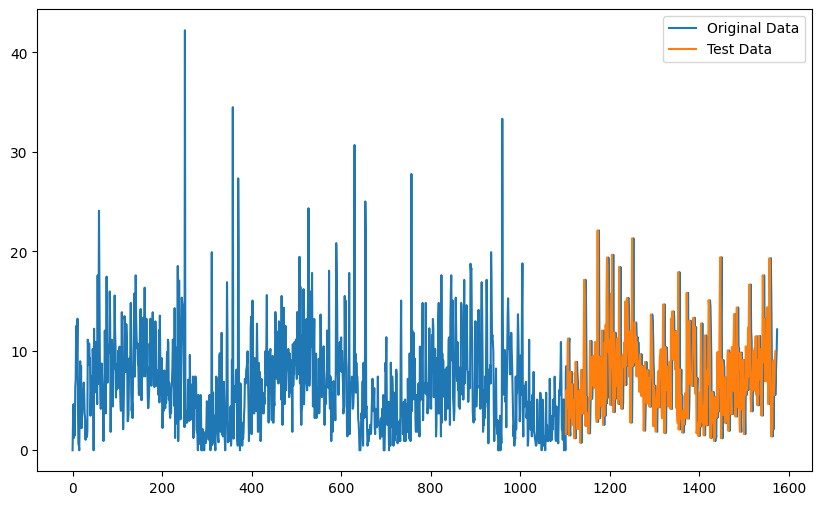

In [5]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features] for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(4, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(trainX.reshape(-1, look_back), trainY)

# Random Forest model
model_rf = RandomForestRegressor(random_state=7)
model_rf.fit(trainX.reshape(-1, look_back), trainY)

# XGBoost model
model_xgb = XGBRegressor(random_state=7)
model_xgb.fit(trainX.reshape(-1, look_back), trainY)

# Function to calculate RMSE, MSE, and MAE
def evaluate_model(model, testX, testY, scaler):
    # Make predictions
    predictions = model.predict(testX.reshape(-1, look_back))
    predictions = predictions.reshape(-1, 1)
    
    # Invert predictions and testY to original scale
    predictions_inv = scaler.inverse_transform(predictions)
    testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(testY_inv, predictions_inv))
    mse = mean_squared_error(testY_inv, predictions_inv)
    mae = mean_absolute_error(testY_inv, predictions_inv)
    
    return rmse, mse, mae

# Evaluate models
models = {
    'LSTM': model_lstm,
    'Linear Regression': model_lr,
    'Random Forest': model_rf,
    'XGBoost': model_xgb
}

results = {}
for name, model in models.items():
    rmse, mse, mae = evaluate_model(model, testX, testY, scaler)
    results[name] = {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  RMSE: {result['RMSE']:.2f}")
    print(f"  MSE: {result['MSE']:.2f}")
    print(f"  MAE: {result['MAE']:.2f}")
    print()

# Plotting (optional)
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(train_size + np.arange(len(testY)), scaler.inverse_transform(testY.reshape(-1, 1)), label='Test Data')
#plt.plot(train_size + np.arange(len(testPredict)), testPredict, label='LSTM Predictions')
plt.legend()
plt.show()


C:\Users\JeromGnanamanikam\anaconda3\envs\forecasting\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
LSTM:
  RMSE: 0.08
  MSE: 0.01
  MAE: 0.06

Linear Regression:
  RMSE: 0.08
  MSE: 0.01
  MAE: 0.06

Random Forest:
  RMSE: 0.09
  MSE: 0.01
  MAE: 0.06

XGBoost:
  RMSE: 0.10
  MSE: 0.01
  MAE: 0.07



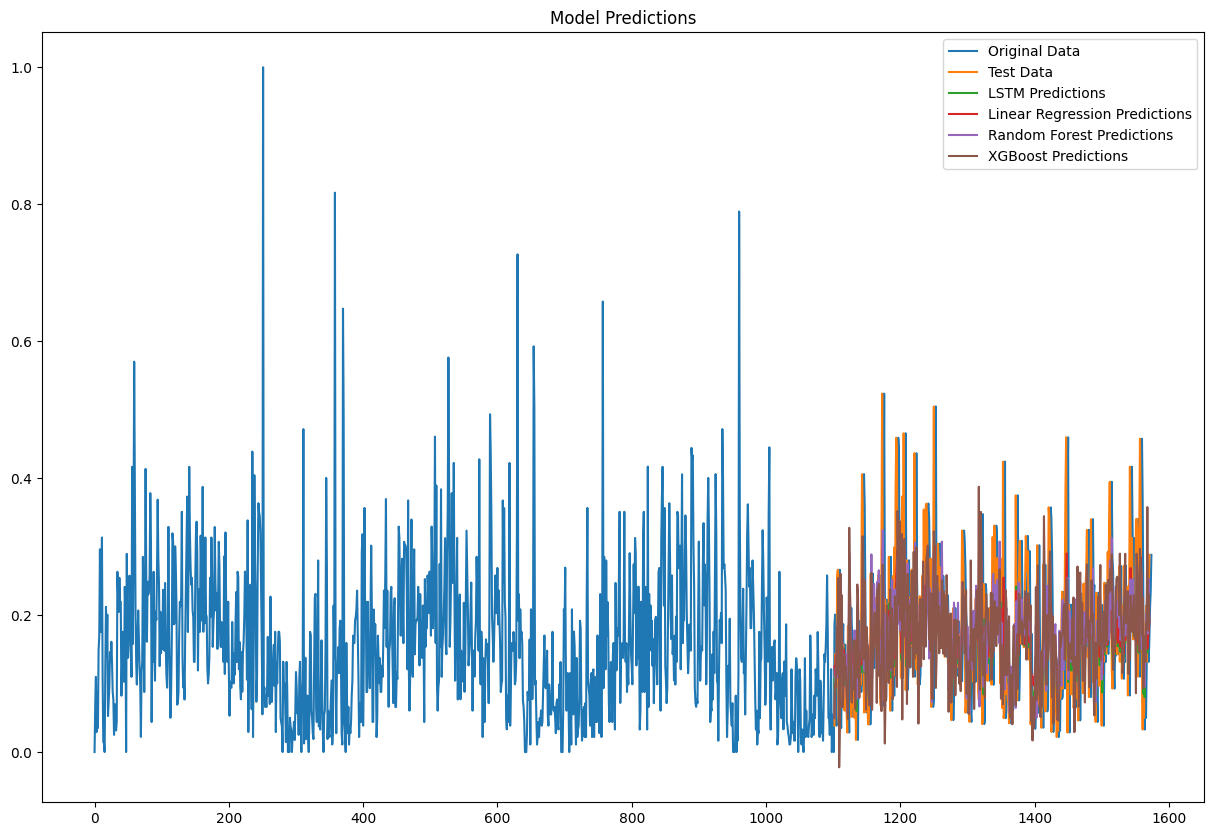

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]

# Function to create dataset matrix
def create_dataset(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features] for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(4, input_shape=(look_back, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)

# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(trainX.reshape(-1, look_back), trainY)

# Random Forest model
model_rf = RandomForestRegressor(random_state=7)
model_rf.fit(trainX.reshape(-1, look_back), trainY)

# XGBoost model
model_xgb = XGBRegressor(random_state=7)
model_xgb.fit(trainX.reshape(-1, look_back), trainY)

# Function to calculate RMSE, MSE, and MAE
def evaluate_model(model, testX, testY, scaler):
    # Make predictions
    predictions = model.predict(testX.reshape(-1, look_back))
    predictions = predictions.reshape(-1, 1)
    
    # Invert predictions and testY to original scale
    predictions_inv = scaler.inverse_transform(predictions)
    testY_inv = scaler.inverse_transform(testY.reshape(-1, 1))
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(testY_inv, predictions_inv))
    mse = mean_squared_error(testY_inv, predictions_inv)
    mae = mean_absolute_error(testY_inv, predictions_inv)
    
    return predictions_inv, rmse, mse, mae

# Evaluate models and collect results
models = {
    'LSTM': model_lstm,
    'Linear Regression': model_lr,
    'Random Forest': model_rf,
    'XGBoost': model_xgb
}

results = {}
for name, model in models.items():
    predictions, rmse, mse, mae = evaluate_model(model, testX, testY, scaler)
    results[name] = {
        'Predictions': predictions,
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae
    }

# Print results
for name, result in results.items():
    print(f"{name}:")
    print(f"  RMSE: {result['RMSE']:.2f}")
    print(f"  MSE: {result['MSE']:.2f}")
    print(f"  MAE: {result['MAE']:.2f}")
    print()

# Plotting
plt.figure(figsize=(15, 10))

# Original data and test data
plt.plot(scaler.inverse_transform(dataset), label='Original Data')
plt.plot(train_size + np.arange(len(testY)), scaler.inverse_transform(testY.reshape(-1, 1)), label='Test Data')

# Plot predictions for each model
for name, result in results.items():
    plt.plot(train_size + np.arange(len(result['Predictions'])), result['Predictions'], label=f'{name} Predictions')

plt.legend()
plt.title('Model Predictions')
plt.show()
